INTERPOLATION SETUP
Original data points: 11
Interpolation points (high-res): 101

✓ Plot 1 saved as 'interpolation_all_points.png'


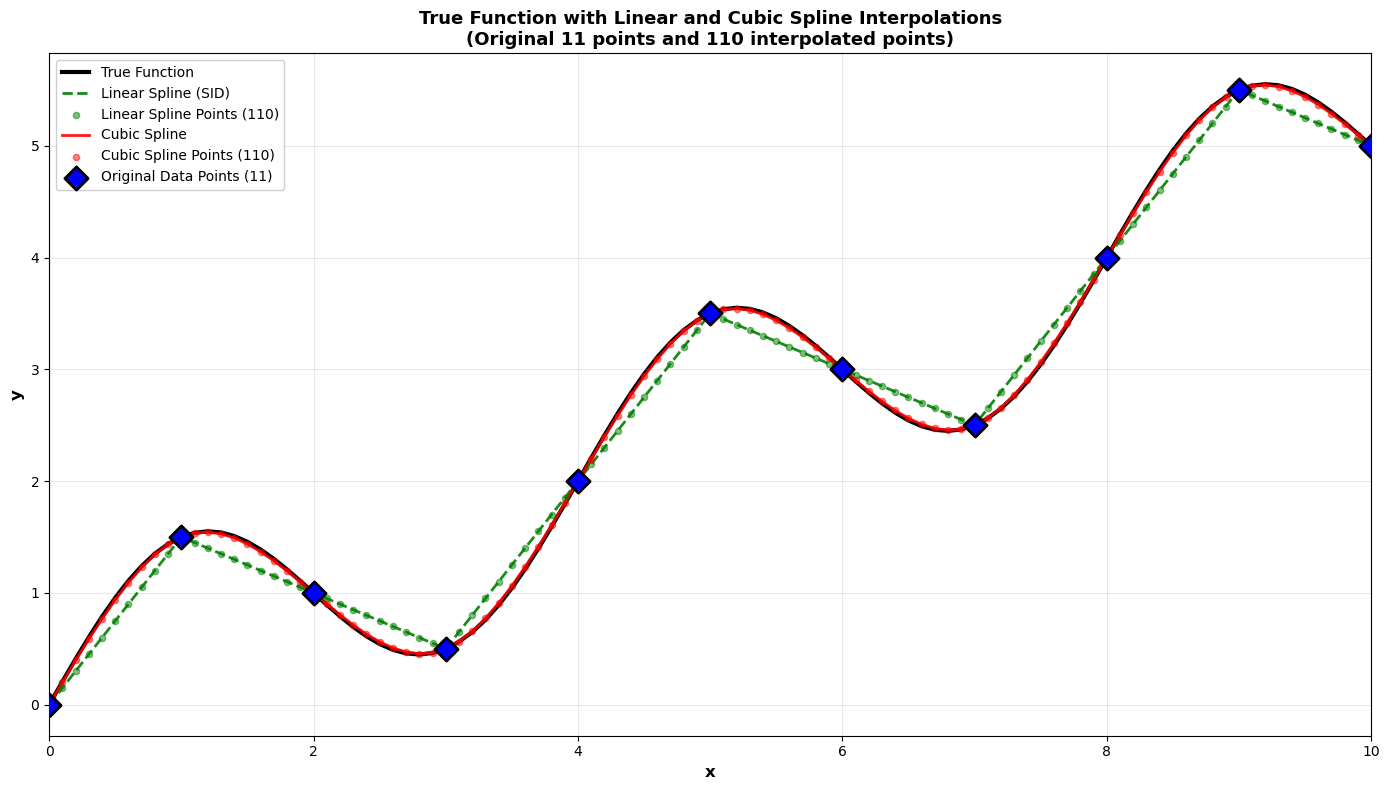

✓ Plot 2 saved as 'relative_error.png'


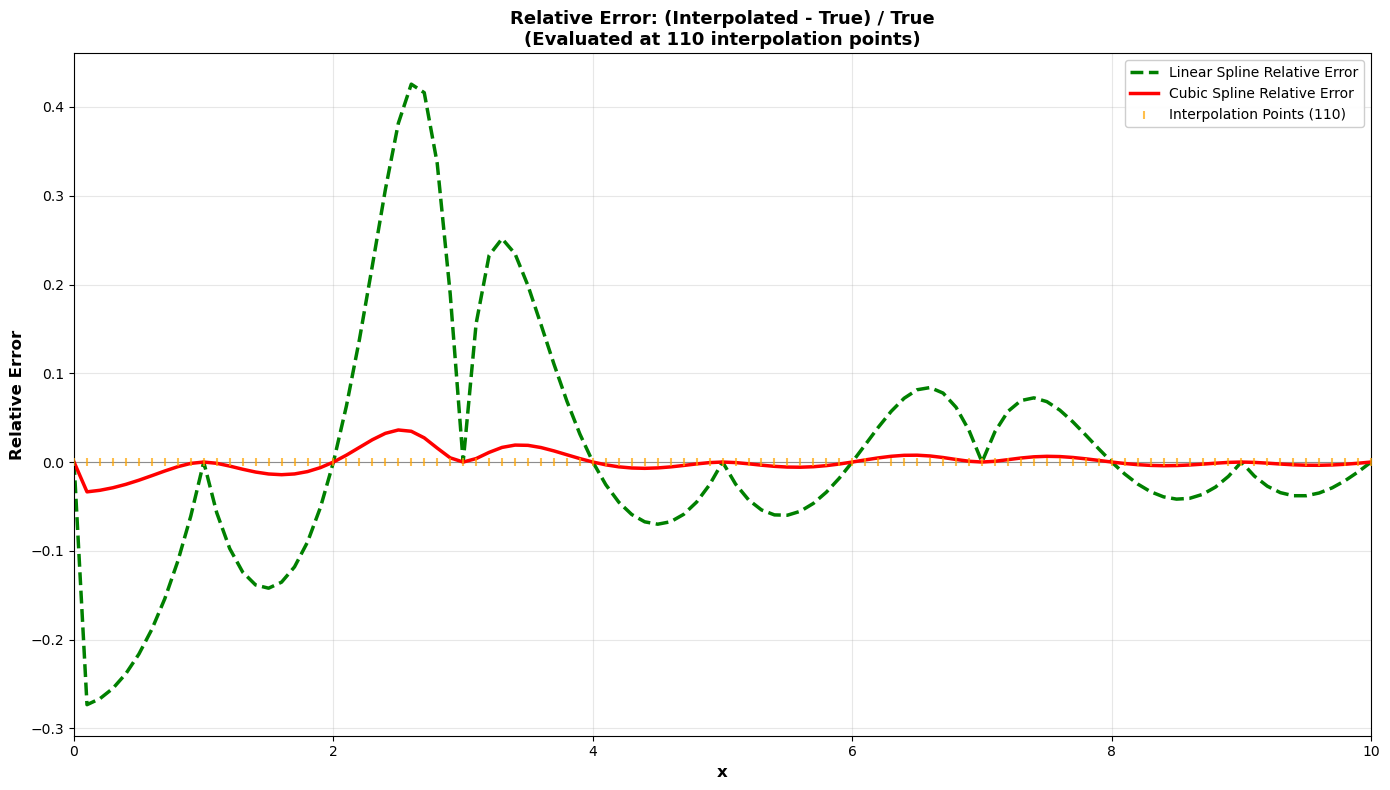

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Define the true function
def true_function(x):
    """y = sin(π*x/2) + x/2"""
    return np.sin((np.pi/2) * x) + x/2


def linear_interpolate_sid(x_data, y_data, x_query):
    """
    Linear interpolation using SID (Version 3) - Pure Python formula-based approach.
    
    Formula:
    y = y_i + (y_{i+1} - y_i) * (x - x_i) / (x_{i+1} - x_i)
    """
    
    x_data = np.asarray(x_data)
    y_data = np.asarray(y_data)
    x_query = np.asarray(x_query)
    
    # Ensure data is sorted
    if not np.all(x_data[:-1] <= x_data[1:]):
        sort_indices = np.argsort(x_data)
        x_data = x_data[sort_indices]
        y_data = y_data[sort_indices]
    
    # Initialize result array
    y_interp = np.zeros_like(x_query, dtype=float)
    
    # Process each query point
    for idx, x in enumerate(x_query):
        
        # Extrapolation below data range
        if x <= x_data[0]:
            y_interp[idx] = y_data[0]
            continue
        
        # Extrapolation above data range
        if x >= x_data[-1]:
            y_interp[idx] = y_data[-1]
            continue
        
        # Interpolation within data range
        for i in range(len(x_data) - 1):
            if x_data[i] <= x <= x_data[i + 1]:
                
                x0 = x_data[i]
                x1 = x_data[i + 1]
                y0 = y_data[i]
                y1 = y_data[i + 1]
                
                # Linear interpolation formula
                y_interp[idx] = y0 + (y1 - y0) * (x - x0) / (x1 - x0)
                break
    
    return y_interp


# ============================================================================
# READ DATA FROM FILE
# ============================================================================

file_path = r"D:\\Physics\\Computational Physics and Astrophysics\\Interpolation\\function_data.txt"

x_data = []
y_data = []

with open(file_path, "r") as f:
    for line in f:
        line = line.strip()
        # Skip empty lines and comments
        if not line or line.startswith('#'):
            continue
        # Parse data
        parts = line.split()
        if len(parts) >= 2:
            x_data.append(float(parts[0]))
            y_data.append(float(parts[1]))

x_data = np.array(x_data)
y_data = np.array(y_data)

# ============================================================================
# GENERATE 110 EVALUATION POINTS (10x HIGHER RESOLUTION FROM 11 POINTS)
# ============================================================================

x_eval = np.linspace(x_data.min(), x_data.max(), len(x_data) * 10 - 9)  # 11*10 - 9 = 110

print("="*80)
print("INTERPOLATION SETUP")
print("="*80)
print(f"Original data points: {len(x_data)}")
print(f"Interpolation points (high-res): {len(x_eval)}")

# ============================================================================
# PERFORM INTERPOLATIONS
# ============================================================================

# Linear interpolation using SID method
y_linear = linear_interpolate_sid(x_data, y_data, x_eval)

# Cubic spline interpolation
cubic_spline = CubicSpline(x_data, y_data, bc_type='natural')
y_cubic = cubic_spline(x_eval)

# Get true values from actual function at interpolation points
y_true = true_function(x_eval)

# ============================================================================
# PLOT 1: TRUE FUNCTION, LINEAR & CUBIC, SHOWING ALL 110 INTERPOLATION POINTS
# ============================================================================

fig, ax1 = plt.subplots(figsize=(14, 8))

# True function (smooth black curve)
ax1.plot(x_eval, y_true, 'k-', linewidth=3, label='True Function', zorder=1)

# Linear spline: curve + 110 interpolation points
ax1.plot(x_eval, y_linear, color='green', linewidth=2.0, linestyle='--',
         label='Linear Spline (SID)', alpha=0.9, zorder=2)
ax1.scatter(x_eval, y_linear, s=20, color='green', alpha=0.5,
            zorder=3, label='Linear Spline Points (110)')

# Cubic spline: curve + 110 interpolation points
ax1.plot(x_eval, y_cubic, color='red', linewidth=2.0, linestyle='-',
         label='Cubic Spline', alpha=0.9, zorder=2)
ax1.scatter(x_eval, y_cubic, s=20, color='red', alpha=0.5,
            zorder=3, label='Cubic Spline Points (110)')

# Original 11 data points
ax1.scatter(x_data, y_data, s=140, color='blue', marker='D',
            edgecolors='black', linewidth=2, zorder=4, label='Original Data Points (11)')

ax1.set_xlabel('x', fontsize=12, fontweight='bold')
ax1.set_ylabel('y', fontsize=12, fontweight='bold')
ax1.set_title('True Function with Linear and Cubic Spline Interpolations\n'
              '(Original 11 points and 110 interpolated points)', fontsize=13, fontweight='bold')
ax1.set_xlim([0, 10])
ax1.grid(True, alpha=0.3)

# To avoid duplicate legend entries for the 110 points, we can handle legend manually
handles, labels = ax1.get_legend_handles_labels()
# Remove duplicates by preserving order
unique = {}
for h, l in zip(handles, labels):
    if l not in unique:
        unique[l] = h
ax1.legend(unique.values(), unique.keys(), fontsize=10, loc='best', framealpha=0.95)

plt.tight_layout()
plt.savefig('interpolation_all_points.png', dpi=150, bbox_inches='tight')
print("\n✓ Plot 1 saved as 'interpolation_all_points.png'")
plt.show()

# ============================================================================
# PLOT 2: RELATIVE ERROR (UNCHANGED LOGIC, STILL USING THE SAME 110 POINTS)
# ============================================================================

epsilon = 1e-10  # Avoid division by zero
relative_error_linear = (y_linear - y_true) / (np.abs(y_true) + epsilon)
relative_error_cubic = (y_cubic - y_true) / (np.abs(y_true) + epsilon)

fig, ax2 = plt.subplots(figsize=(14, 8))

# Relative errors as continuous curves
ax2.plot(x_eval, relative_error_linear, color='green', linewidth=2.5,
         linestyle='--', label='Linear Spline Relative Error', zorder=2)
ax2.plot(x_eval, relative_error_cubic, color='red', linewidth=2.5,
         linestyle='-', label='Cubic Spline Relative Error', zorder=2)

# Zero line
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.8, alpha=0.5, zorder=1)

# Mark 110 interpolation x positions
ax2.scatter(x_eval, np.zeros_like(x_eval), s=30, color='orange',
            marker='|', linewidth=1.5, alpha=0.7, zorder=3, label='Interpolation Points (110)')

ax2.set_xlabel('x', fontsize=12, fontweight='bold')
ax2.set_ylabel('Relative Error', fontsize=12, fontweight='bold')
ax2.set_title('Relative Error: (Interpolated - True) / True\n'
              '(Evaluated at 110 interpolation points)', fontsize=13, fontweight='bold')
ax2.set_xlim([0, 10])
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10, loc='best', framealpha=0.95)

plt.tight_layout()
plt.savefig('relative_error.png', dpi=150, bbox_inches='tight')
print("✓ Plot 2 saved as 'relative_error.png'")
plt.show()
